In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1. Data Exploration:
#### a. Load the dataset and perform exploratory data analysis (EDA).


In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.rename(columns={
    'DiabetesPedigreeFunction':'DPF'},inplace=True)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

## EDA

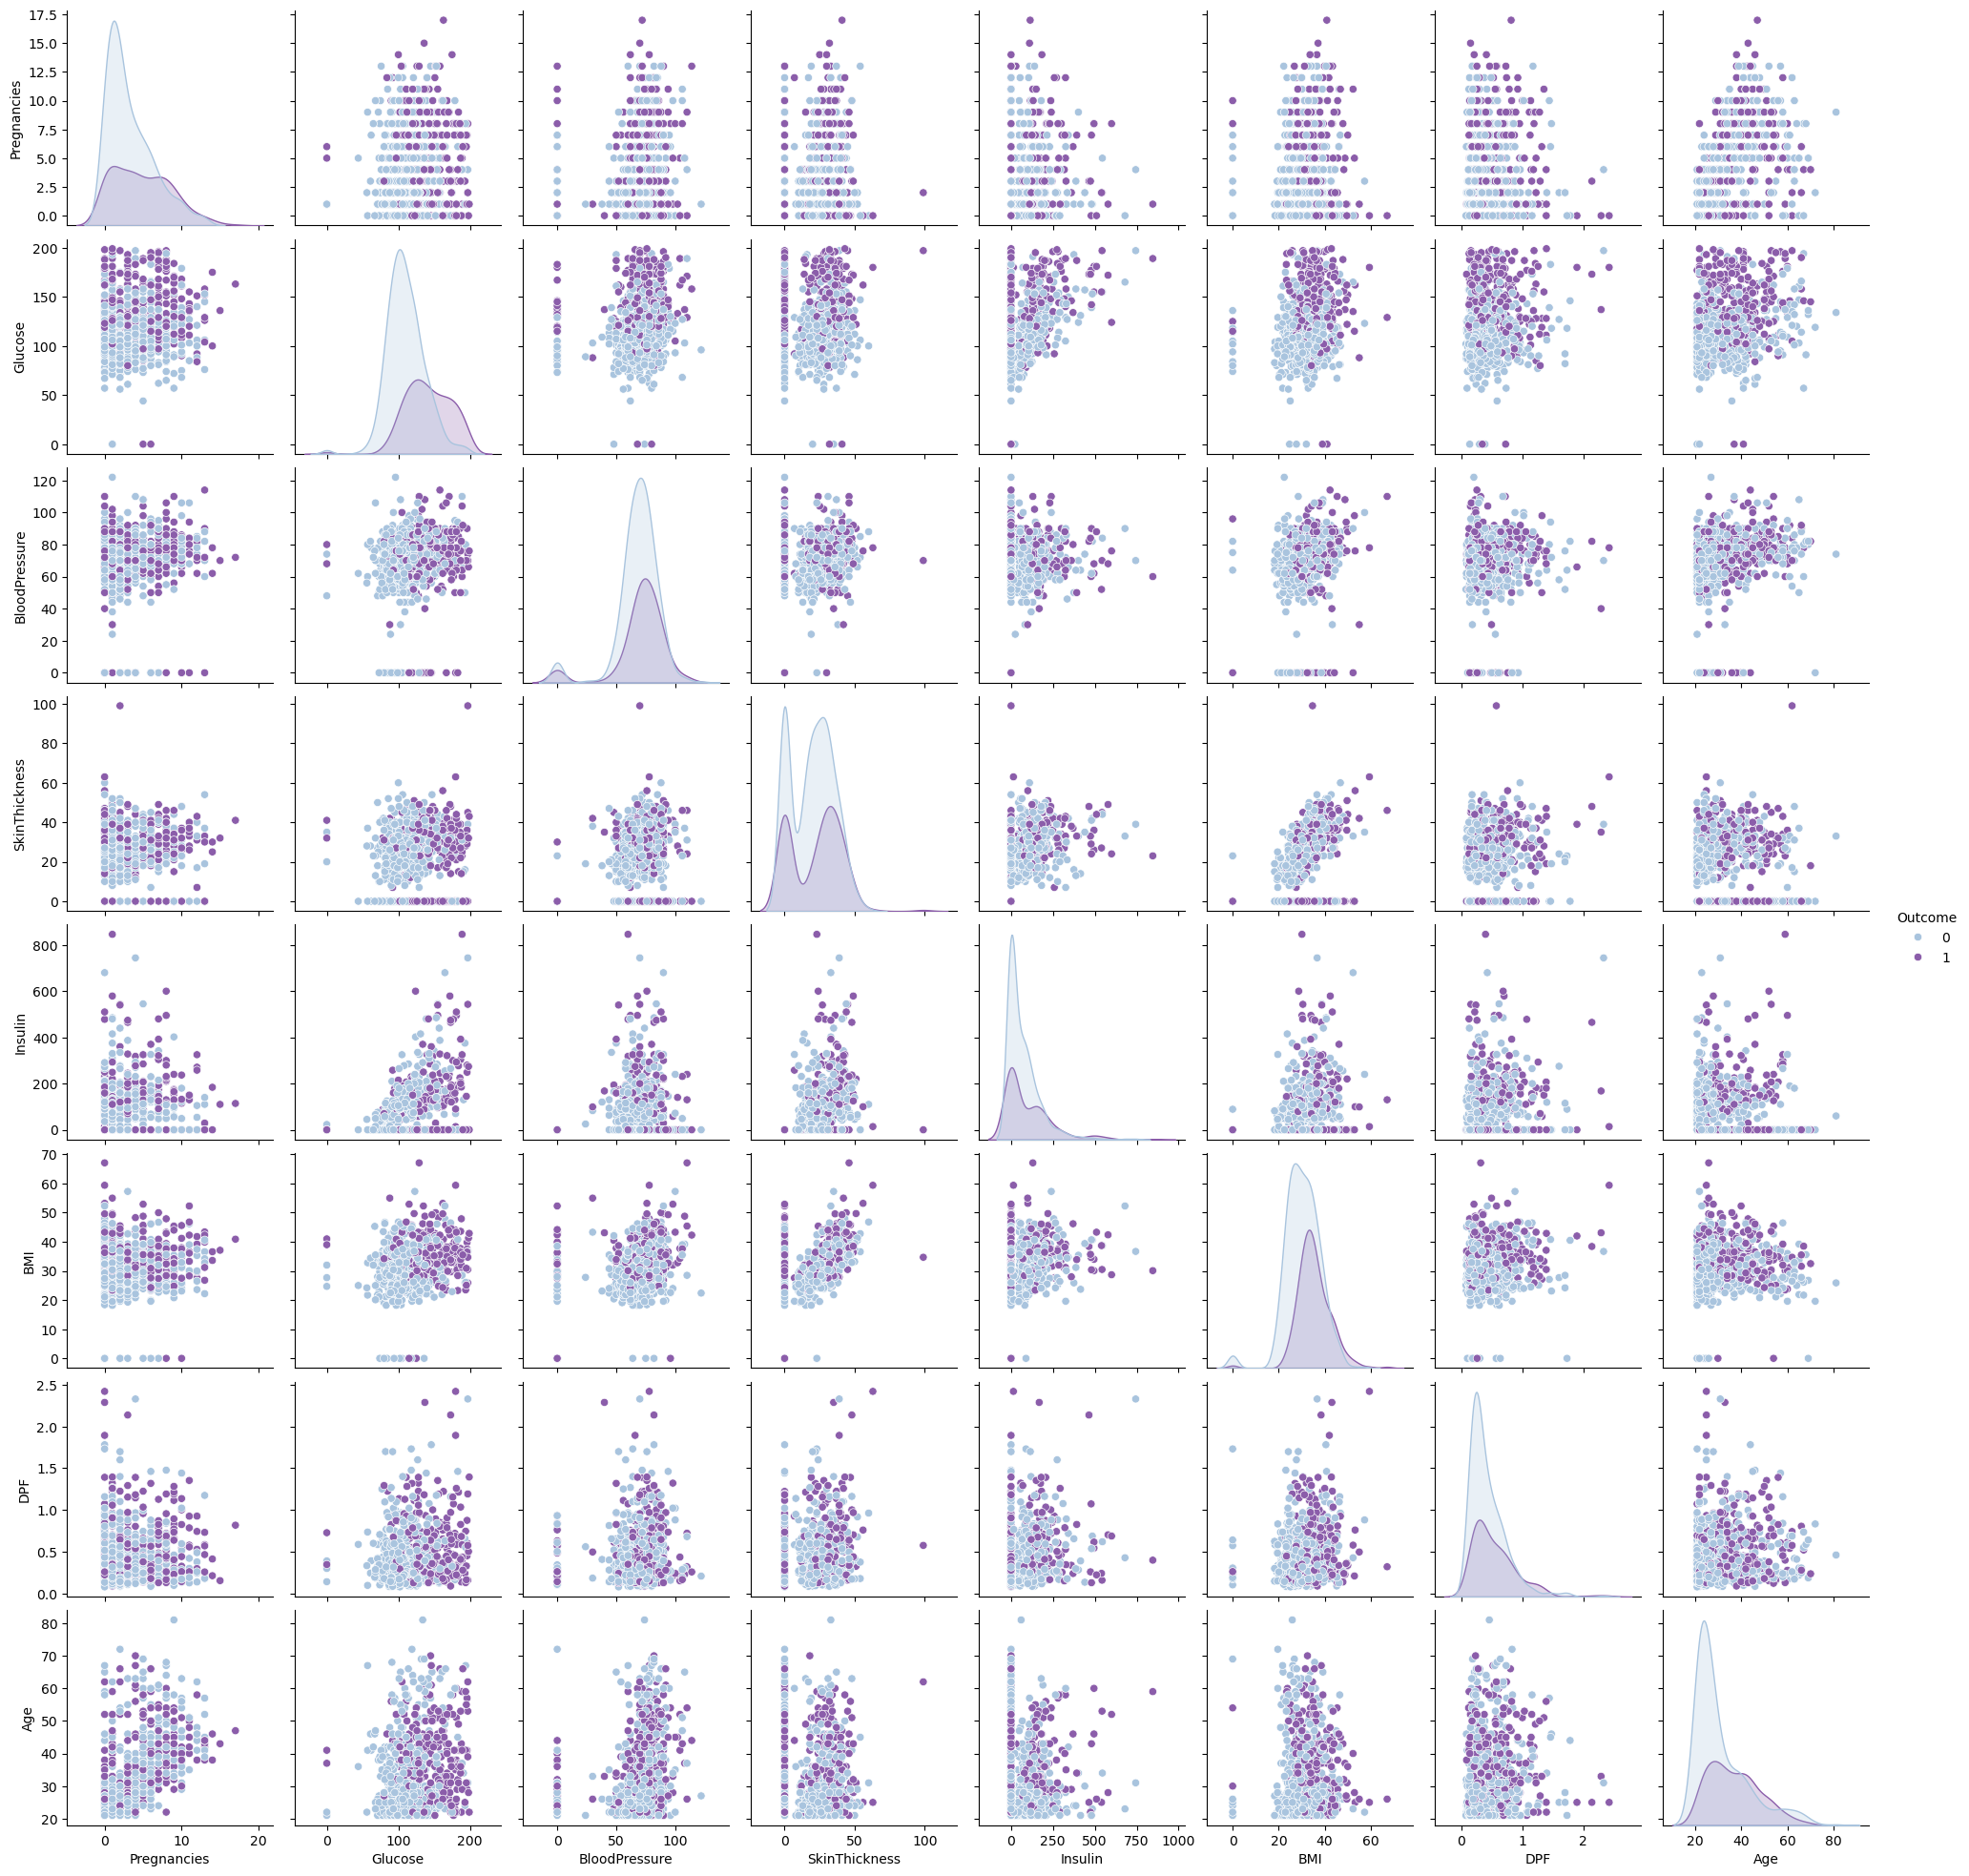

In [9]:
sns.pairplot(data,hue='Outcome',palette = 'BuPu')
plt.show()

In [10]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#from the above we can see that the features are  not strongly correlated

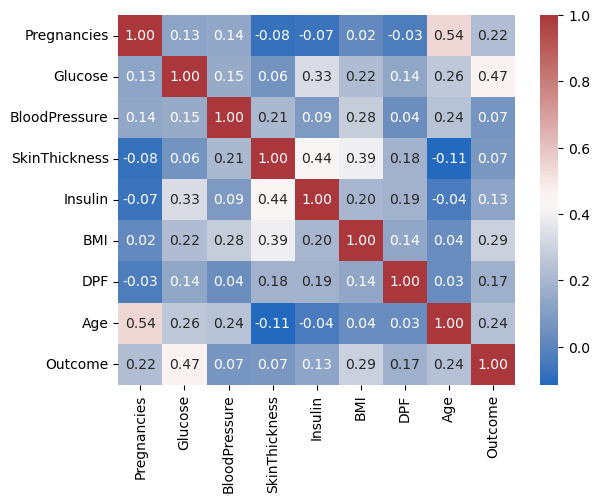

In [12]:
sns.heatmap(corr,cmap='vlag', annot=True, fmt='0.2f')
plt.show()

### Age Distribution

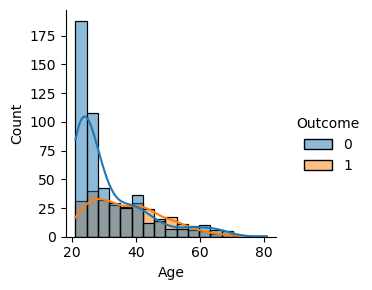

In [13]:
sns.displot(data=data, x='Age',
            kind='hist',
            height=3,
            color='Tomato',
            hue='Outcome',
            kde=True
           )
plt.show()

### BloodPressure

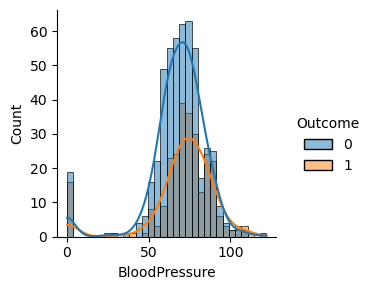

In [18]:
sns.displot(data=data, x='BloodPressure',
            kind='hist',
            height=3,
            color='Tomato',
            hue='Outcome',
            kde=True
           )
plt.show()

## DPF

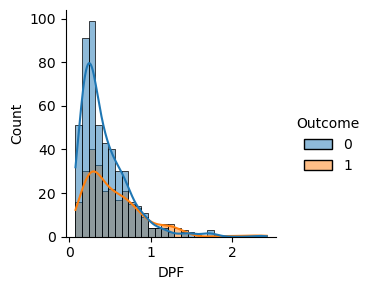

In [19]:
sns.displot(data=data, x='DPF',
            kind='hist',
            height=3,
            color='Tomato',
            hue='Outcome',
            kde=True
           )
plt.show()

### Boxplot

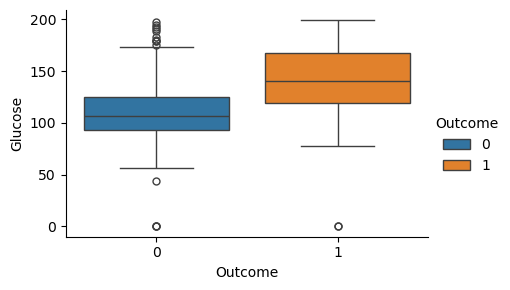

In [26]:
sns.catplot(data=data, x='Outcome',y='Glucose', 
            kind='box',
            height=3, aspect=1.5,
            hue='Outcome'
           )
plt.show()

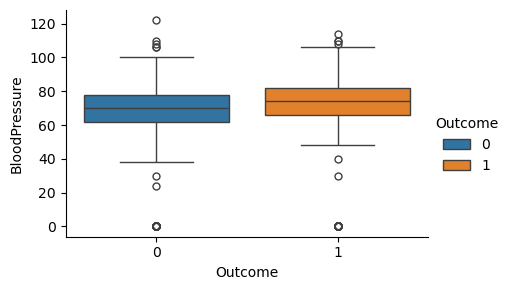

In [30]:
sns.catplot(data=data, x='Outcome',y='BloodPressure', 
            kind='box',
            height=3, aspect=1.5,
            hue='Outcome'
           )
plt.show()

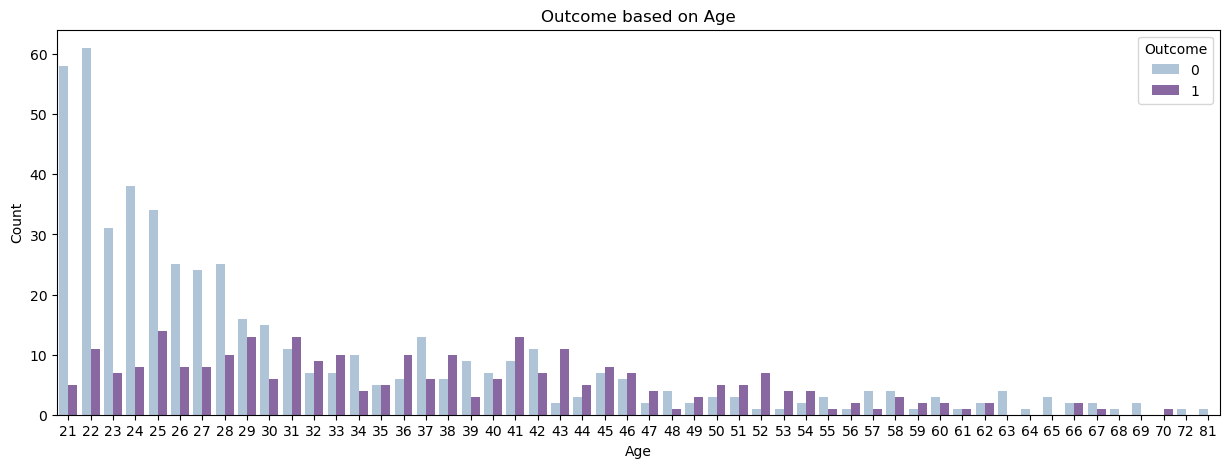

In [37]:
# Outcome based on age
plt.figure(figsize=(15, 5))
sns.countplot(x='Age', hue='Outcome', data=data, palette='BuPu')
plt.title('Outcome based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

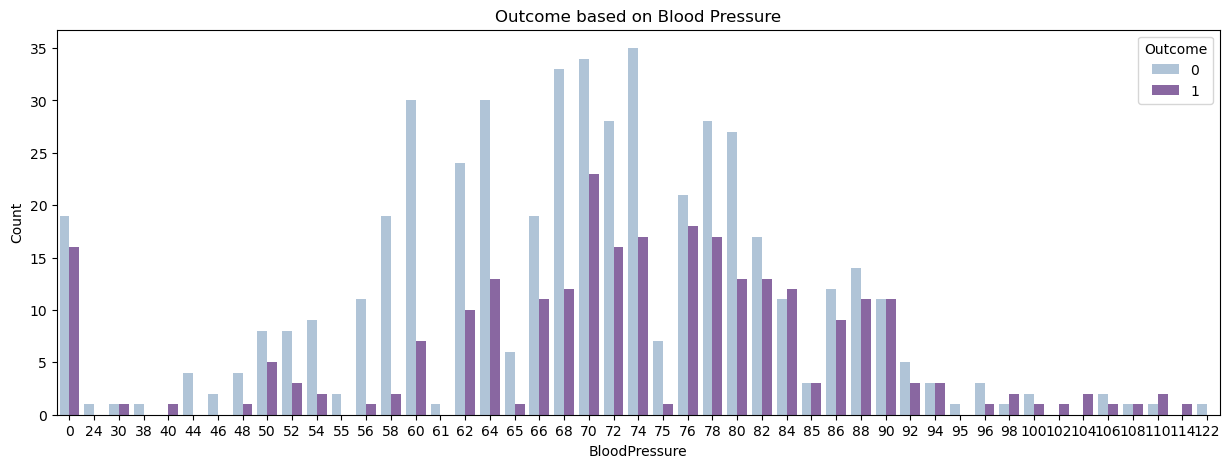

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(x='BloodPressure', hue='Outcome', data=data, palette='BuPu')
plt.title('Outcome based on Blood Pressure')
plt.xlabel('BloodPressure')
plt.ylabel('Count')
plt.show()

### 2. Data Preprocessing:
#### a. Handle missing values (e.g., imputation).
#### b. Encode categorical variables


In [43]:
#check for missing values
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [ ]:
# the output indicates their are no missing values

In [44]:
## There are no categorical columns in this data

### 3. Model Building:
#### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#### b. Train the model using the training data.


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [47]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age']]
y= data['Outcome']

In [48]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

### Build the model

In [50]:
from sklearn.linear_model import LogisticRegression

In [52]:

clf = LogisticRegression(max_iter=500)

# Train the model
clf.fit(X_train,y_train)

LogisticRegression(max_iter=500)

### 4. Model Evaluation:
#### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.


### Evaluate the model on training data

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [54]:
yhat_train = clf.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
cm

array([[353,  48],
       [ 93, 120]])

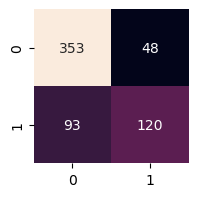

In [55]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()

In [60]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.71      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



In [62]:
def plot_roc(y,yhat):

    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y, yhat)
    print(f'AUC: {auc}')
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'o--')
    plt.show()

AUC: 0.7218397667802325


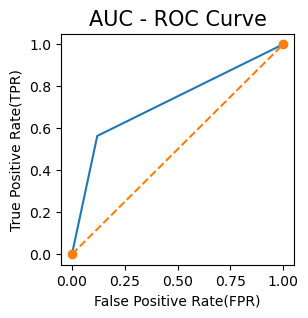

In [63]:
plot_roc(y_train,yhat_train)

### Evaluate the model on testing data

In [64]:
yhat_test = clf.predict(X_test)

cm = confusion_matrix(y_test,yhat_test)
cm

array([[78, 21],
       [18, 37]])

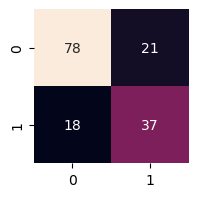

In [65]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()

In [66]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



AUC: 0.7303030303030302


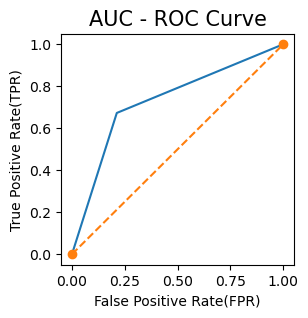

In [67]:
plot_roc(y_test,yhat_test)

### 5. Interpretation:
##### a. Interpret the coefficients of the logistic regression model.
##### b. Discuss the significance of features in predicting the target variable (survival probability in this case).


##### Ans: a: From classification_report(ytest, yhat_test) :
##### Accuracy ≈ 0.75 (75% of test observations correctly classified).
##### Precision for class 1 ≈ 0.64 (when the model predicts diabetes, it is correct 64% of the time).
##### Recall for class 1 ≈ 0.67 (it finds about 67% of actual diabetes cases).
##### F1‑score for class 1 ≈ 0.65 (balance of precision and recall for diabetes).

##### b : Significance of features for survival/diabetes
##### From  correlation matrix and the typical diabetes model behavior:
##### Glucose has the strongest positive association with Outcome (correlation ≈ 0.47), so its coefficient will be clearly positive and important.
##### BMI, Age, DPF (DiabetesPedigreeFunction), and Pregnancies also show positive correlations with Outcome and thus positive coefficients, meaning higher values increase diabetes risk.
##### BloodPressure, SkinThickness, and Insulin have weaker correlations with Outcome, so their coefficients will likely be smaller in magnitude and possibly less statistically significant in the model

### Interview Questions:
#### 1. What is the difference between precision and recall?
#### 2. What is cross-validation, and why is it important in binary classification?


### Ans:
#### 1. The precision tells us out of cases predicted cases of positive how many are actually positive.
#### 2. Precision tellse us out of cases that are actually positive how many were predicted as positive.